# Arreglos con numpy. Parte II

## Programación para Análisis de Datos 

### Mtra. Gisel Hernández Chávez


### Contenido

13. Características de numpy que lo hacen potente

        13.1 Vectorización
            13.1.1 Operaciones aritméticas con arreglos
            13.1.2 Funciones trigonométricas aplicadas a un arreglo
        13.2 Transmisión
            13.2.1 Reglas detalladas de transmisión
            13.2.2 Transmisión, propagación o estiramiento de un escalar
            13.2.3 Ejemplos de transmisiones válidas y no válidas
14. Cambiar la forma (shape) de un arreglo

        14.1 Sin cambiar sus datos con reshape()
        14.2 Aplanado con ravel()
        14.3 Aplanado flatten() y atributo flat
15. Valores faltantes y valores infinitos en arreglos de numpy 
16. Generación de números aleatorios en numpy

        16.1 Generación de números aleatorios flotantes con rand() y random()
        16.2 Generación de números aleatorios enteros
        16.3 Distribución Normal con media 0  (mean=0) y varianza 1 (variance=1)
        16.4 Toma de una muestra de datos con choice()
        16.5 Uso de seed()
17. Multiplicación de matrices en numpy usando el operador @

        14.1 Multilicación de arreglo por un escalar
        14.2 Multilicación de arreglo por otro arreglo
18. Producto interior (inner product)

        15.1 Producto punto (dot product)

In [1]:
import numpy as np
from datetime import datetime

In [2]:
# Para obtener múltiples salidas de una celda
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 13.Características de numpy que lo hacen potente

### 13.1 Vectorización 

La vectorización describe la ausencia de cualquier bucle explícito, indexación, etc. en el código. Sucede sólo "detrás de escena" en código C optimizado y precompilado. El código vectorizado tiene muchas ventajas:

    + Es más conciso y más fácil de leer
    + Tiene menos líneas de código por lo que generalmente significa menos errores
    + El código se parece más a la notación matemática estándar (lo que facilita codificar correctamente las construcciones matemáticas)
    + Da como resultado un código más "Pythonico". Sin la vectorización, nuestro código estaría plagado de bucles for inefi-cientes y difíciles de leer.

#### 13.1.1 Operaciones aritméticas con arreglos

Aunque los arreglos no tienen la misma dimensión, numpy aplica verifica las reglas de compatibilidad y, si se cumplen, aplica reglas de propagación para llevarlos a dimensiones compatibles. Posteriormente realiza la operación. 

In [3]:
a = np.array([[0,0,0],[10,10,10],[20,20,20],[30,30,30]])
b = np.array([0,1,2])

## ¿Qué ocurre detrás de escena cuando las dimensiones son diferentes?

In [4]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [5]:
a - b

array([[ 0, -1, -2],
       [10,  9,  8],
       [20, 19, 18],
       [30, 29, 28]])

In [6]:
a * b 

array([[ 0,  0,  0],
       [ 0, 10, 20],
       [ 0, 20, 40],
       [ 0, 30, 60]])

In [7]:
b / a  # Note que 0/0 es nan y 1/0 es inf
# El tipo de la matriz resultante es float porque hay un nan que es de tipo float.

C:\Users\ghernand\AppData\Local\Temp\ipykernel_2700\3458332907.py:1: RuntimeWarning: divide by zero encountered in divide
  b / a  # Note que 0/0 es nan y 1/0 es inf
C:\Users\ghernand\AppData\Local\Temp\ipykernel_2700\3458332907.py:1: RuntimeWarning: invalid value encountered in divide
  b / a  # Note que 0/0 es nan y 1/0 es inf


array([[       nan,        inf,        inf],
       [0.        , 0.1       , 0.2       ],
       [0.        , 0.05      , 0.1       ],
       [0.        , 0.03333333, 0.06666667]])

In [8]:
a % b 

C:\Users\ghernand\AppData\Local\Temp\ipykernel_2700\745184068.py:1: RuntimeWarning: divide by zero encountered in remainder
  a % b


array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [9]:
b ** a 

array([[         1,          1,          1],
       [         0,          1,       1024],
       [         0,          1,    1048576],
       [         0,          1, 1073741824]])

### Otro ejemplo con suma de dos arreglos de diferente dimensión

In [10]:
a = np.array([[1, 2], [3, 4], [5, 6]], float) 
b = np.array([-1, 3], float) 
a 

array([[1., 2.],
       [3., 4.],
       [5., 6.]])

In [11]:
b 

array([-1.,  3.])

In [12]:
a + b 

array([[0., 5.],
       [2., 7.],
       [4., 9.]])

#### 13.1.2 Funciones trigonométricas aplicadas a un arreglo

In [13]:
#np.sin?

In [14]:
#np.degrees?

In [15]:
x= np.array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]]])

In [16]:
f = np.sin(x) # Devuelve un nuevo arreglo con el valor del seno de cada elemento de x en radianes
f

array([[[ 0.84147098],
        [ 0.90929743],
        [ 0.14112001]],

       [[-0.7568025 ],
        [-0.95892427],
        [-0.2794155 ]]])

In [17]:
np.degrees(f) # Convierte 'angulos de radianes a grados

array([[[ 48.21273601],
        [ 52.09890488],
        [  8.08558087]],

       [[-43.36158891],
        [-54.94231381],
        [-16.00932878]]])

### 13.2 Transmisión (propagación) (*broadcasting*)

El término transmisión describe cómo numpy trata a los arreglos con diferentes formas durante las operaciones aritméticas. Sujeto a ciertas restricciones, __el arreglo más pequeño se "transmite" a través del arreglo más grande para que tengan formas compatibles__. La transmisión proporciona un medio para vectorizar las operaciones del arreglo para que el bucle se produzca en C en lugar de Python.

__"Broadcasting"__ es el término utilizado para describir el comportamiento implícito elemento por elemento de las operaciones.

En general, en NumPy todas las operaciones, no solo las operaciones aritméticas, sino también las lógicas, bit a bit, funcionales, etc., se comportan de esta manera implícita elemento por elemento, es decir, transmiten.

En el ejemplo siguiente, a y b podrían ser arreglos multidimensionales de la misma forma, o un escalar y un arreglo, o incluso dos arreglos con formas diferentes, __siempre que el arreglo más pequeño sea "expandible" a la forma del más grande__, de tal manera que la emisión resultante sea inequívoca. 

#### 13.2.1 Reglas detalladas de transmisión

Tomadas de: https://numpy.org/doc/stable/user/basics.broadcasting.html

__1-__ El ejemplo de transmisión más simple ocurre cuando un __arreglo y un valor escalar__ se combinan en una operación, ya que __se usa el escalar para aplicarlo a todos los elementos del arreglo__.

__2-__ Cuando opera en __dos arreglos__, NumPy compara sus formas por elementos. __Comienza con las dimensiones finales__ (es decir, más a la derecha) __y avanza hacia la izquierda__. 

    Dos dimensiones son compatibles cuando:
    
        + son iguales, o 
        + una de las dimensiones es 1
    
__El tamaño del arreglo resultante es el tamaño que no es 1__ a lo largo de cada eje de las entradas.

#### 13.2.2 Transmisión, propagación o estiramiento de un escalar

Tomado de https://numpy.org/doc/1.20/user/theory.broadcasting.html

+ En el siguiente ejemplo el escalar 2 se convierte en un arreglo b(1) del mismo tamaño para que la operación (multiplicación en este caso), sea compatible elemento por elemento

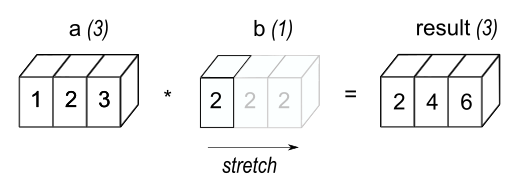

In [18]:
a = np.array([1,2,3]) * 2
a

array([2, 4, 6])

#### 13.2.3 Ejemplos de transmisiones válidas y no válidas

##### Ejemplo de propagación cuando una de las dimensiones es 1



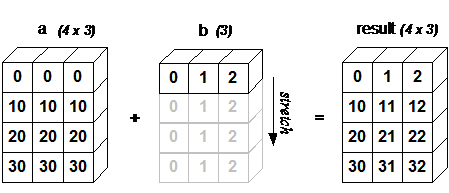


In [19]:
a = np.array([[0,0,0],[10,10,10],[20,20,20],[30,30,30]])
b = np.array([0,1,2])
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

#### Ejemplo con arreglos de 4 y 3 dimensiones:

A(4d array)            8 x  1 x  6 x  1

B(3d array)                 7 x  1 x  5 

Result(4d array)       8 x  7 x  6 x  5

+ Note que se colocan alineadas a la derecha


In [20]:
#np.ones?

In [21]:
A = np.ones((8,1,6,1)) * 2
B = np.ones((7,1,5)) * 3
(A + B ).shape

(8, 7, 6, 5)

In [22]:
try:
    A = np.ones((8,2,6,1)) * 2
    B = np.ones((7,1,5)) * 3
    (A + B ).shape
except Exception as e:
    print(e)

operands could not be broadcast together with shapes (8,2,6,1) (7,1,5) 


#### Ejemplo con arreglos de forma (4,1) y (3,):



In [23]:
a1 = np.array([[0],[10],[20],[30]])
a1.shape

(4, 1)

In [24]:
a2 = np.array([0,1,2])
a2.shape

(3,)

In [25]:
a1 + a2

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

Si a.shape es (5,1), b.shape es (1,6), c.shape es (6,) y d.shape es () de modo que d es un escalar,

+ Entonces a, b, c, y d son todos ampliables a la dimensión (5,6); y

+ a actúa como un arreglo (5,6) donde un [:, 0] se transmite a las otras columnas,

+ b actúa como un arreglo (5,6) donde b [0 ,:] se transmite a las otras filas,

+ c actúa como un arreglo (1,6) y, por lo tanto, como un arreglo (5,6) donde c [:] se transmite a cada fila, y finalmente,

+ d actúa como un arreglo (5,6) donde se repite el valor único.

#### Ejemplo de incompatibilidad de formas para propagar

In [26]:
x = np.arange(4) 
y = np.arange(3)
x,y

try:
    x.shape
    y.shape
    x + y
except ValueError as e:
    print(e)

(array([0, 1, 2, 3]), array([0, 1, 2]))

(4,)

(3,)

operands could not be broadcast together with shapes (4,) (3,) 


### 14 Cambiar la forma (shape) de un arreglo

#### 14.1 Sin cambiar sus datos con reshape()

np.reshape(a, nueva forma, orden='C')

Da una nueva forma a un arreglo sin cambiar sus datos.

In [27]:
#np.reshape?

In [ ]:
v1 = np.array(np.arrange(8))
v1

In [ ]:
v1.reshape(4,2)

In [28]:
a3 = np.array([1,2,3,4,5,6,7,8,9,10])
a3.shape

(10,)

In [29]:

a3.reshape(5,2)

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [30]:
a3.reshape(2,5)

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [32]:

try:
    a3.reshape(2,3)
except Exception as e:
    print(e)

cannot reshape array of size 10 into shape (2,3)


In [33]:
try:
    a3.reshape(2,4)
except Exception as e:
    print(e)

cannot reshape array of size 10 into shape (2,4)


In [34]:
a3.reshape(1,10)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])

In [35]:
x
x.shape

array([0, 1, 2, 3])

(4,)

In [36]:
xx = x.reshape(4,1)
xx
xx.shape

array([[0],
       [1],
       [2],
       [3]])

(4, 1)

In [37]:
y = np.ones(5)
y

array([1., 1., 1., 1., 1.])

In [38]:
xx.shape, y.shape
print(xx +y)
(xx + y).shape

((4, 1), (5,))

[[1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4.]]


(4, 5)

In [39]:
z = np.ones((3,4))
z

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [40]:
x, x.shape, z, z.shape
(x + z).shape
x + z

(array([0, 1, 2, 3]),
 (4,),
 array([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]),
 (3, 4))

(3, 4)

array([[1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.]])

### 14.2 Aplanado con ravel()

numpy.ravel(a, orden='C')

Devuelve un arreglo aplanado contiguo.

Se devuelve un arreglo 1-D que contiene los elementos de la entrada. Se hace una copia sólo si es necesario.

In [41]:
x1 = np.array([[1, 3, 5], [11, 35, 56]])  
y1 = np.ravel(x1) 
y1, x1.shape,y1.shape

(array([ 1,  3,  5, 11, 35, 56]), (2, 3), (6,))

In [42]:
x1[0,1] =33
x1, y1

(array([[ 1, 33,  5],
        [11, 35, 56]]),
 array([ 1, 33,  5, 11, 35, 56]))

### 14.3 Aplanado con flatten() y atributo flat

+ flat es un atributo. 
+ ndarray.flat es un iterador 1-D sobre el arreglo

+ flatten() es un método
+ ndarray.flatten(order='C') retorna una copia del arrelo en una dimensión.

In [43]:
a = np.array([[1,2], [3,4]])
a.flatten(), a.flatten().shape

a.flatten('F'), a.flatten().shape

(array([1, 2, 3, 4]), (4,))

(array([1, 3, 2, 4]), (4,))

In [44]:
a.flat

In [45]:
for i in a.flat:
    print(i) 

1
2
3
4


In [46]:
arreglo2 = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

arreglo2.flatten(), arreglo2.flatten().shape

arreglo2.flatten('F'), arreglo2.flatten().shape

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), (12,))

(array([ 1,  7,  4, 10,  2,  8,  5, 11,  3,  9,  6, 12]), (12,))

### Diferencia entre flatten() y ravel()

+ La diferencia entre ravel() y flatten() es que el nuevo arreglo creado con ravel() es en realidad una referencia al arreglo original. Por lo tanto, cualquier cambio en el nuevo arreglo también afectará al original.
+ ravel() es eficiente en memoria, ya que no crea una copia.

## 15. Valores faltantes y valores infinitos en arreglos de numpy

np.nan se usa para valores faltante y np. inf para los infinitos (un ejemplo es el resultado de una división por 0)

#### Ejemplo con nan

Suponga que termina el semestre y tengo en un arreglo las evaluaciones de mis 3 alumnos de maestría, donde las filas representan a los alumnos y las columnas las evaluaciones. Algunos alumnos no presentaron exámenes o tareas. Los arreglos de numpy permiten colocar los valores perdidos o faltantes con np.nan 

La matriz pudiera ser la siguiente:

In [47]:
eval_msc=np.array([[100,np.nan,90,100], [94,95,90,100],[np.nan,np.nan,70,80]])
eval_msc

array([[100.,  nan,  90., 100.],
       [ 94.,  95.,  90., 100.],
       [ nan,  nan,  70.,  80.]])

Para colocar todas las calificaciones en un vector unidimensional puedo usar flatten()

In [ ]:
eval_msc.flatten() #lo convierte a una sola dimensión

In [1]:
# Generar arreglos
np.random.seed(33)
a1 = np.random.rand(2,2)
a2 = np.random.rand(2,2)
a1,a2

NameError: name 'np' is not defined

In [54]:
#Mostrar los elementos comunes a dos arreglos bidimensionales.
np.intersect1d(np.ravel(a1),np.ravel(a2))

array([], dtype=float64)

#### Ejemplo con valores infinitos

In [55]:
arr_inf = np.array([1, 0, np.nan, np.inf])
print("Arreglo original")
print(arr_inf)
print("prueba elemento por elemento si es o no infinito:")
print(np.isinf(arr_inf))

Arreglo original
[ 1.  0. nan inf]
prueba elemento por elemento si es o no infinito:
[False False False  True]


## 16. Generación de números aleatorios en numpy

rand(d0, d1, ..., dn) genera números aleatorios de una forma dada d0, d1, ..., dn

https://www.machinelearningplus.com/python/numpy-tutorial-part1-array-python-examples/

In [58]:
np.random.rand?

### 16.1 Generación de números aleatorios flotantes con rand() y random()

__rand(d0, d1, ..., dn)__

Create an array of the given shape and populate it with
random samples from a uniform distribution
over ``[0, 1)``.
+ En teoría de probabilidad y estadística, la distribución uniforme continua es una familia de distribuciones de probabilidad para variables aleatorias continuas, tales que para cada miembro de la familia, todos los intervalos de igual longitud en la distribución en su rango son igualmente probables. El dominio está definido por dos parámetros, a y b, que son sus valores mínimo y máximo respectivamente.
+ En teoría de probabilidad y estadística, la distribución uniforme discreta es una distribución de probabilidad discreta simétrica que surge en espacios de probabilidad equiprobables, es decir, en situaciones donde de n resultados diferentes, todos tienen la misma probabilidad de ocurrir.

__random(size=None)__

Devuelve flotantes aleatorios en el intervalo semi abierto [0.0, 1.0)

In [59]:
# Números aleatorios entre [0,1) de la forma 2,2

print(np.random.rand(2,2))

[[0.6804508  0.48658813]
 [0.96502682 0.39339874]]


In [60]:
# Devuelve un solo número aleatorio entre [0,1)
print(np.random.random())

0.07955757128689422


In [61]:
# Números aleatorios entre [0,1) - no incluye al 0, pero sí al 1 de la forma 2,2
print(np.random.random(size=[2,2]))

[[0.35140742 0.16363516]
 [0.98316682 0.88062818]]


### 16.2 Generación de números aleatorios enteros

__randint(d0, d1, ..., dn)__

Genera enteros de la forma d0,d1,...,dn

In [63]:
# enteros aleatorios entre [0, 10) de la forma 2,2
print(np.random.randint(0, 10, size=[2,2]))

[[3 7]
 [3 7]]


### 16.3 Distribución Normal con media 0  (mean=0) y varianza 1 (variance=1)

__randn(d0, d1, ..., dn)__

Devuelve una muestra (o muestras) de la distribución "normal estándar".

In [64]:
# Distribución Normal con media 0  (mean=0) y varianza 1 (variance=1) de la forma 2,2
print(np.random.randn(2,2))

[[-0.66825229 -0.79973546]
 [ 1.56199086 -2.00813785]]


(array([ 1.,  2.,  2.,  1.,  2.,  4.,  0.,  1.,  6.,  6., 10.,  6.,  5.,
        10., 10., 12., 18., 13., 19., 13., 14., 26., 13., 24., 17., 11.,
        13., 20., 11., 14., 13., 16., 20.,  6.,  9.,  5.,  5.,  3.,  2.,
         2.,  4.,  2.,  4.,  0.,  0.,  2.,  1.,  1.,  0.,  1.]),
 array([-2.63673248, -2.52163377, -2.40653506, -2.29143635, -2.17633763,
        -2.06123892, -1.94614021, -1.8310415 , -1.71594279, -1.60084408,
        -1.48574537, -1.37064666, -1.25554795, -1.14044924, -1.02535052,
        -0.91025181, -0.7951531 , -0.68005439, -0.56495568, -0.44985697,
        -0.33475826, -0.21965955, -0.10456084,  0.01053788,  0.12563659,
         0.2407353 ,  0.35583401,  0.47093272,  0.58603143,  0.70113014,
         0.81622885,  0.93132756,  1.04642628,  1.16152499,  1.2766237 ,
         1.39172241,  1.50682112,  1.62191983,  1.73701854,  1.85211725,
         1.96721596,  2.08231468,  2.19741339,  2.3125121 ,  2.42761081,
         2.54270952,  2.65780823,  2.77290694,  2.88800565,

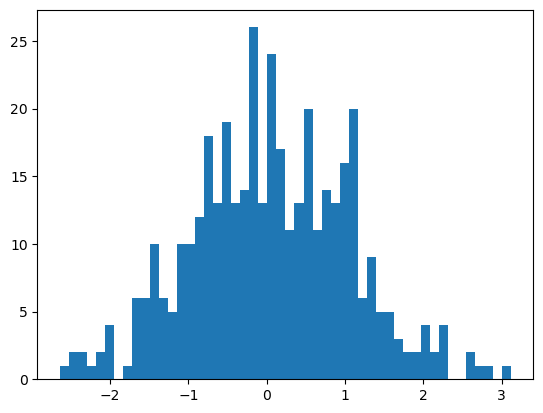

In [71]:
nsample = np.random.randn(400,)
import matplotlib.pyplot as plt
plt.hist(nsample,bins=50)

### 16.4 Toma de una muestra de datos con choice() 



In [73]:
np.random.choice?

In [72]:
# Selecciona 10 elementos de una lista, con igual probabilidad, o sea, hay reemplazo
print(np.random.choice(['a', 'e', 'i', 'o', 'u'], size=10))  

['i' 'u' 'o' 'a' 'a' 'o' 'a' 'o' 'a' 'a']


In [74]:
# Selecciona 10 elementos de una lista con una probabilidad predefinida 'p'
print(np.random.choice(['a', 'e', 'i', 'o', 'u'], size=10, p=[0.3, .1, 0.1, 0.4, 0.1]))  # habrá más oes?

['o' 'i' 'a' 'a' 'i' 'a' 'e' 'a' 'i' 'e']


### 16.5 Uso de seed()

Si desea **repetir el mismo conjunto de números aleatorios cada vez**, debe establecer la **semilla** (*seed*) o el estado aleatorio. La semilla puede ser cualquier valor. El único requisito es que debe establecer la semilla en el mismo valor cada vez que desee generar el mismo conjunto de números aleatorios.

In [75]:
# Crear el random state
rn = np.random.RandomState(100)

# Crear números aleatorios entre [0,1) de la forma 2,2
print(rn.rand(2,2))

[[0.54340494 0.27836939]
 [0.42451759 0.84477613]]


In [76]:
# Fiajt la semilla aleatoria
np.random.seed(100)

# Crear números aleatorios entre [0,1) con la forma 2,2
print(np.random.rand(2,2))

[[0.54340494 0.27836939]
 [0.42451759 0.84477613]]


Observe que se generan los mismos números

In [77]:
# Crear arreglo de enteros aleatorios de tamaño 10 entre [0,10)  - el 10 está excluido
np.random.seed(100)
arr_rand = np.random.randint(0, 10, size=10)
print(arr_rand)

[8 8 3 7 7 0 4 2 5 2]


### Valores únicos

In [78]:
# Obtener los números únicos y contarlos
uniqs, counts = np.unique(arr_rand, return_counts=True)
print("Unique items : ", uniqs)
print("Counts       : ", counts)

Unique items :  [0 2 3 4 5 7 8]
Counts       :  [1 2 1 1 1 2 2]


## Ejercicios

### E1
Grafica y=x^2+3x

1. ¿Qué pasa si las x se generan aleatoriamente?
2. ¿Qué pasa si las x se generan con igual espaciamiento?

In [3]:
import matplotlib.pyplot as plt
import numpy as np

1. Solución: Para solucionarlo se usa un np.linspace, que genera valores de 

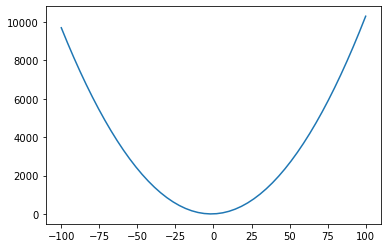

In [50]:
x = np.linspace(-100,100)
plt.plot(x, x**2+3*x);

2. Solución: Se usa un random. Se puede ver que los datos están muy distribuidos, se tiene que ordenarlos.

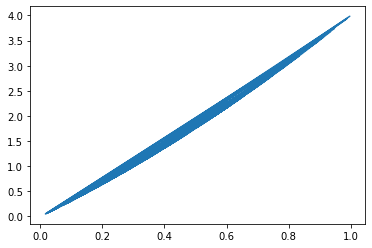

In [53]:
x = np.random.rand(100)
y = x**2+3*x
plt.plot(x,y);

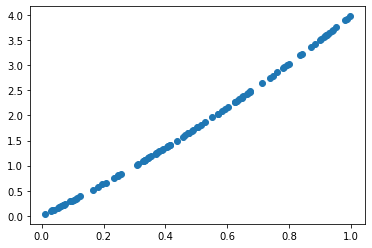

In [55]:
x = [np.random.random() for i in range(100)]
x = np.array(x)
plt.scatter(x,x**2+3*x);